In [ ]:
import pandas as pd

# Caminho do arquivo MetaData.csv
file_path = '/content/MetaData.csv'  # Substitua pelo caminho real

# Ler o CSV
metadata_df = pd.read_csv(file_path)

# Exibir as primeiras linhas
metadata_df.head()


,id,gender,age,county,ptb,remarks
0,1000,male,31,Shenxhen,0,normal
1,1001,male,64,Shenxhen,0,normal
2,1002,male,35,Shenxhen,0,normal
3,1003,male,32,Shenxhen,1,"STB,ATB,tuberculosis pleuritis"
4,1004,male,2,Shenxhen,1,secondary PTB in the bilateral upper field


In [ ]:
# Exibir informações gerais sobre o DataFrame, incluindo tipos de dados
print("\nInformações do DataFrame (tipos de dados, entradas e colunas):")
metadata_df.info()


Informações do DataFrame (tipos de dados, entradas e colunas):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       704 non-null    int64 
 1   gender   704 non-null    object
 2   age      704 non-null    object
 3   county   704 non-null    object
 4   ptb      704 non-null    int64 
 5   remarks  699 non-null    object
dtypes: int64(2), object(4)
memory usage: 33.1+ KB


In [ ]:
# Verificar se há valores nulos em cada coluna
print("\nQuantidade de valores nulos por coluna:")
print(metadata_df.isnull().sum())



Quantidade de valores nulos por coluna:
id         0
gender     0
age        0
county     0
ptb        0
remarks    5
dtype: int64


In [ ]:
# Filtrar os dados para casos positivos de tuberculose (ptb = 1)
positivos_tb = metadata_df[metadata_df['ptb'] == 1]

# Contar a frequência de cada idade nos casos positivos de tuberculose
idade_mais_comum_tb = positivos_tb['age'].value_counts().idxmax()

# Exibir a idade que mais deu positivo para tuberculose
print(f"A idade que mais deu positivo para tuberculose é: {idade_mais_comum_tb}")


A idade que mais deu positivo para tuberculose é: 28


<Figure size 1000x600 with 0 Axes>

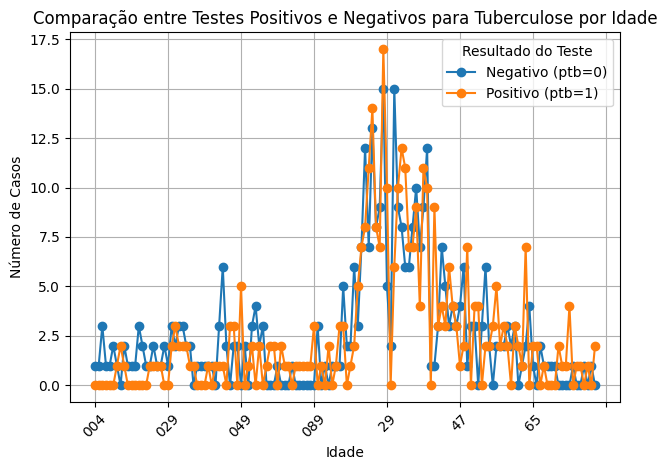

In [ ]:
import matplotlib.pyplot as plt

# Contar o número de casos positivos e negativos por idade
contagem_por_idade = metadata_df.groupby(['age', 'ptb']).size().unstack(fill_value=0)

# Plotar gráfico de linhas
plt.figure(figsize=(10, 6))
contagem_por_idade.plot(kind='line', marker='o')

# Personalizar o gráfico
plt.title("Comparação entre Testes Positivos e Negativos para Tuberculose por Idade")
plt.xlabel("Idade")
plt.ylabel("Número de Casos")
plt.xticks(rotation=45)
plt.legend(title='Resultado do Teste', labels=['Negativo (ptb=0)', 'Positivo (ptb=1)'])
plt.grid(True)

# Exibir o gráfico
plt.tight_layout()
plt.show()


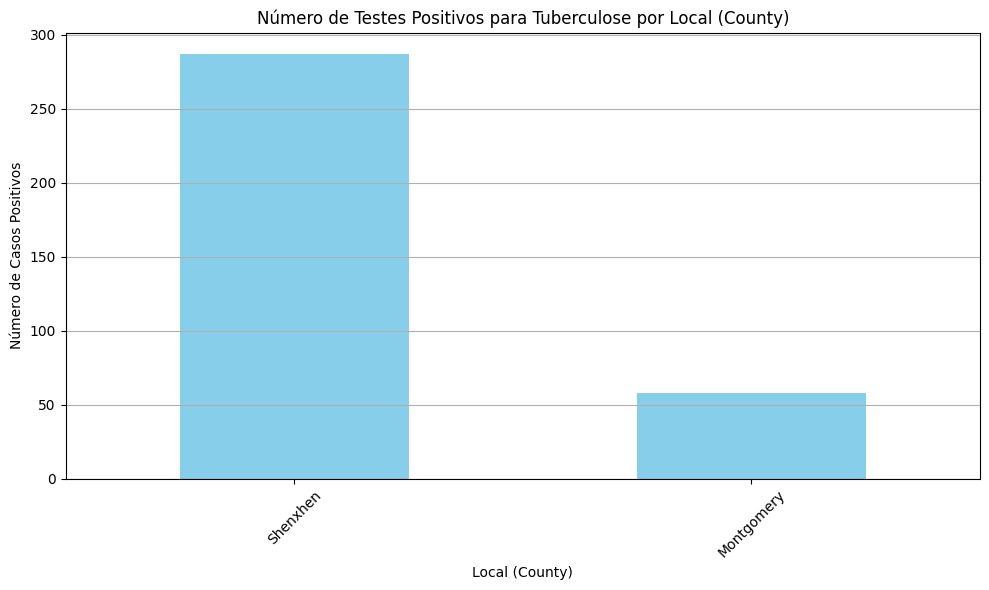

In [ ]:
import matplotlib.pyplot as plt

# Filtrar os dados para testes positivos (ptb = 1)
positivos_tb = metadata_df[metadata_df['ptb'] == 1]

# Agrupar por 'country' (county) e contar o número de casos positivos
contagem_por_county = positivos_tb['county'].value_counts()

# Criar o gráfico
plt.figure(figsize=(10, 6))
contagem_por_county.plot(kind='bar', color='skyblue')

# Personalizar o gráfico
plt.title("Número de Testes Positivos para Tuberculose por Local (County)")
plt.xlabel("Local (County)")
plt.ylabel("Número de Casos Positivos")
plt.xticks(rotation=45)
plt.grid(axis='y')

# Exibir o gráfico
plt.tight_layout()
plt.show()


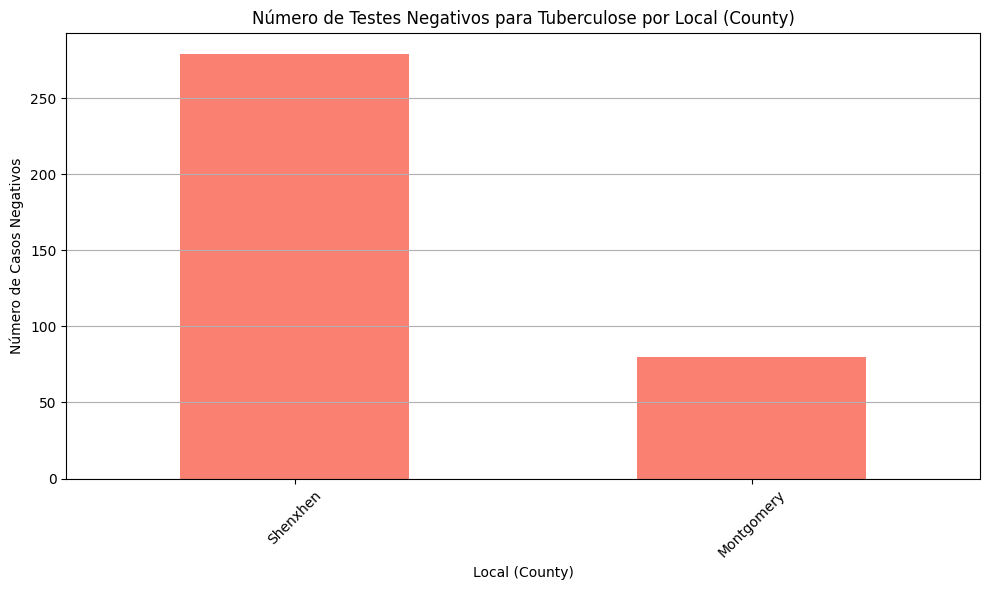

In [ ]:
# Filtrar os dados para testes negativos (ptb = 0)
negativos_tb = metadata_df[metadata_df['ptb'] == 0]

# Agrupar por 'country' (county) e contar o número de casos negativos
contagem_negativos_por_county = negativos_tb['county'].value_counts()

# Criar o gráfico
plt.figure(figsize=(10, 6))
contagem_negativos_por_county.plot(kind='bar', color='salmon')

# Personalizar o gráfico
plt.title("Número de Testes Negativos para Tuberculose por Local (County)")
plt.xlabel("Local (County)")
plt.ylabel("Número de Casos Negativos")
plt.xticks(rotation=45)
plt.grid(axis='y')

# Exibir o gráfico
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Substitua o caminho abaixo pelo caminho correto do seu arquivo CSV
metadata = pd.read_csv('/content/MetaData.csv')

# Exibir as primeiras linhas para verificar se os dados foram carregados corretamente
metadata.head()


,id,gender,age,county,ptb,remarks
0,1000,male,31,Shenxhen,0,normal
1,1001,male,64,Shenxhen,0,normal
2,1002,male,35,Shenxhen,0,normal
3,1003,male,32,Shenxhen,1,"STB,ATB,tuberculosis pleuritis"
4,1004,male,2,Shenxhen,1,secondary PTB in the bilateral upper field


<ipython-input-21-87561c5af8a3>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  metadata['gender'].replace(gender_mapping, inplace=True)


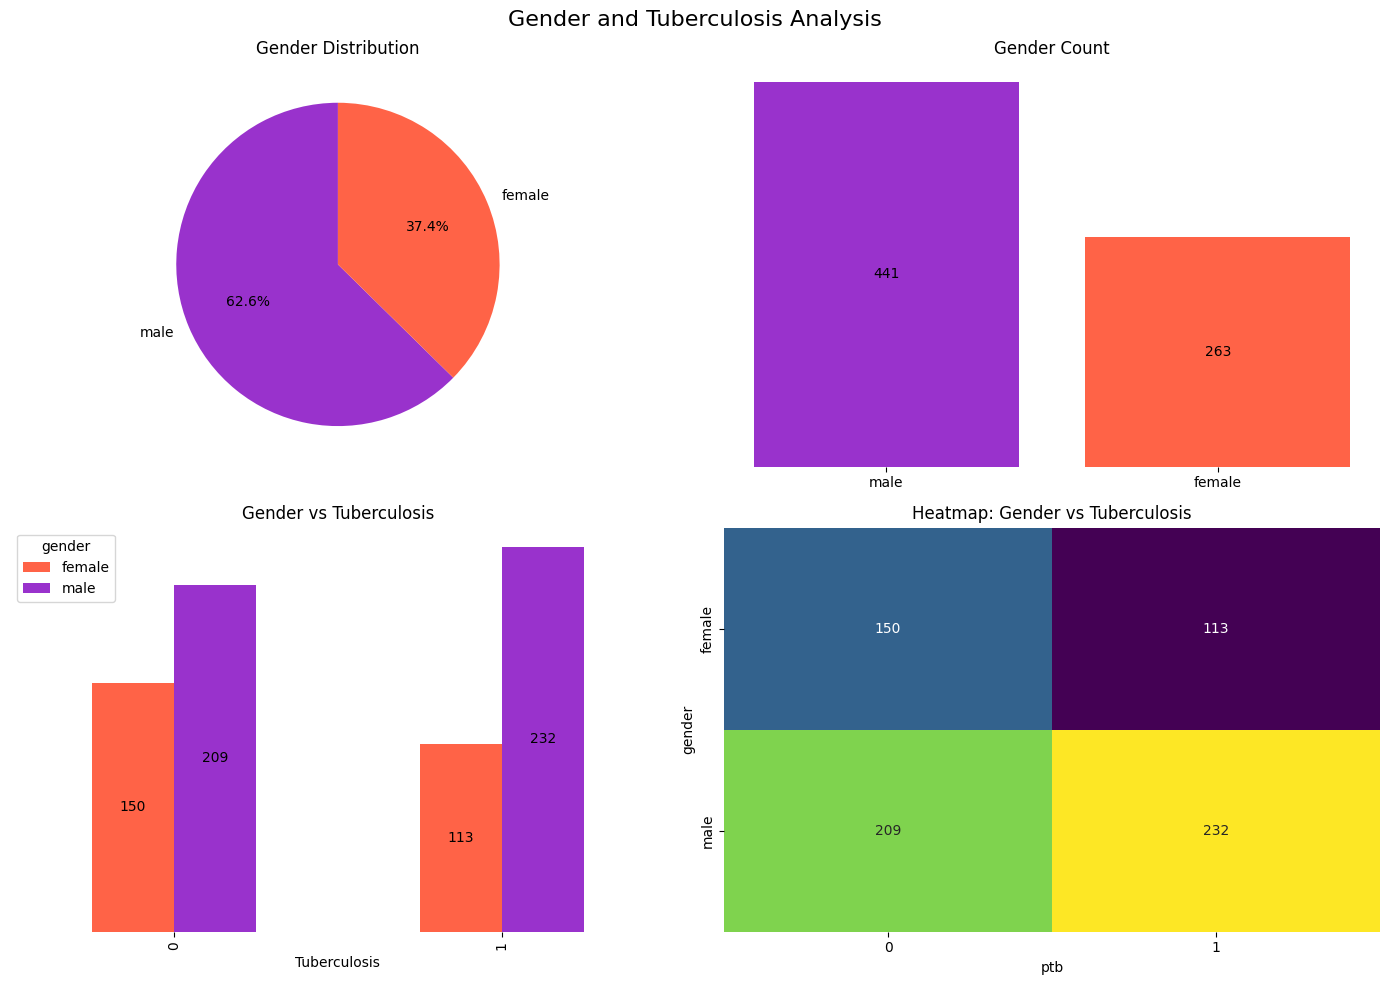

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Mapeamento de gênero
gender_mapping = {
    'm': 'male', 'Male,': 'male', 'male35yrs': 'male', 'male,':'male',
    'f': 'female', 'femal': 'female', 'female24yrs':'female','o':'female','female,':'female'
}

# Ajustando o gênero
metadata['gender'] = metadata['gender'].str.lower()
metadata['gender'].replace(gender_mapping, inplace=True)

# Contagem de cada gênero
agg_data = metadata['gender'].value_counts()

# Tabela cruzada entre gênero e presença de tuberculose (PTB)
ct = pd.crosstab(metadata['gender'], metadata['ptb'])

# Gráfico de Pizza (Distribuição de Gênero)
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.pie(agg_data, labels=agg_data.index, autopct='%1.1f%%', startangle=90, colors=['darkorchid', 'tomato'])
plt.title('Gender Distribution')

# Gráfico de Barras (Contagem de Gênero)
plt.subplot(222)
bars = plt.bar(agg_data.index, agg_data, color=['darkorchid', 'tomato'])
plt.bar_label(bars, labels=[str(height) for height in agg_data], label_type='center')
plt.yticks([])
plt.box(False)
plt.title('Gender Count')

# Gráfico de Barras com Tabela Cruzada (Gênero vs. Tuberculose)
plt.subplot(223)
bars = ct.T.plot(kind='bar', color=['tomato', 'darkorchid'], ax=plt.gca())
plt.bar_label(bars.containers[0], label_type='center')
plt.bar_label(bars.containers[1], label_type='center')
plt.xlabel('Tuberculosis')
plt.yticks([])
plt.box(False)
plt.title('Gender vs Tuberculosis')

# Heatmap (Tabela Cruzada)
plt.subplot(224)
sns.heatmap(ct, annot=True, cbar=False, fmt='d', cmap='viridis')
plt.title('Heatmap: Gender vs Tuberculosis')

plt.suptitle('Gender and Tuberculosis Analysis', fontsize=16)
plt.tight_layout()
plt.show()


<Figure size 1400x800 with 0 Axes>

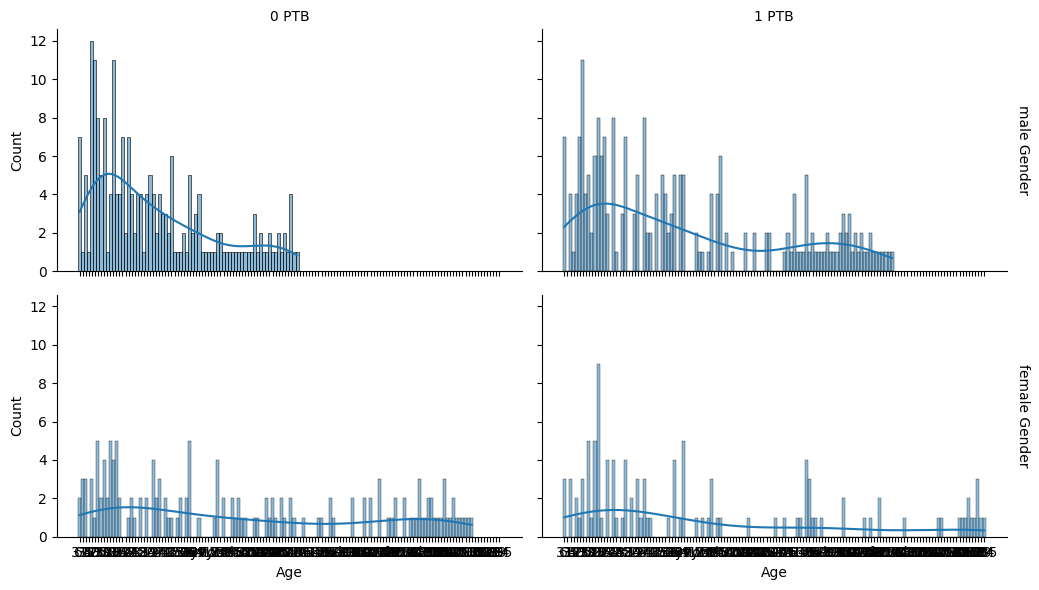

In [ ]:
# Importando as bibliotecas necessárias
import matplotlib.pyplot as plt
import seaborn as sns

# Abaixo é necessário garantir que o dataset metadata esteja carregado corretamente.

# FacetGrid de Idade por Gênero e PTB
plt.figure(figsize=(14,8))

# Criando o FacetGrid
g = sns.FacetGrid(metadata, col='ptb', row='gender', margin_titles=True, aspect=1.75)

# Mapeando os histogramas com a curva KDE para cada grupo
g.map(sns.histplot, 'age', bins=10, kde=True)

# Adicionando rótulos aos eixos e títulos das colunas e linhas
g.set_axis_labels('Age', 'Count')
g.set_titles(col_template="{col_name} PTB", row_template="{row_name} Gender")

# Exibindo o gráfico
plt.show()


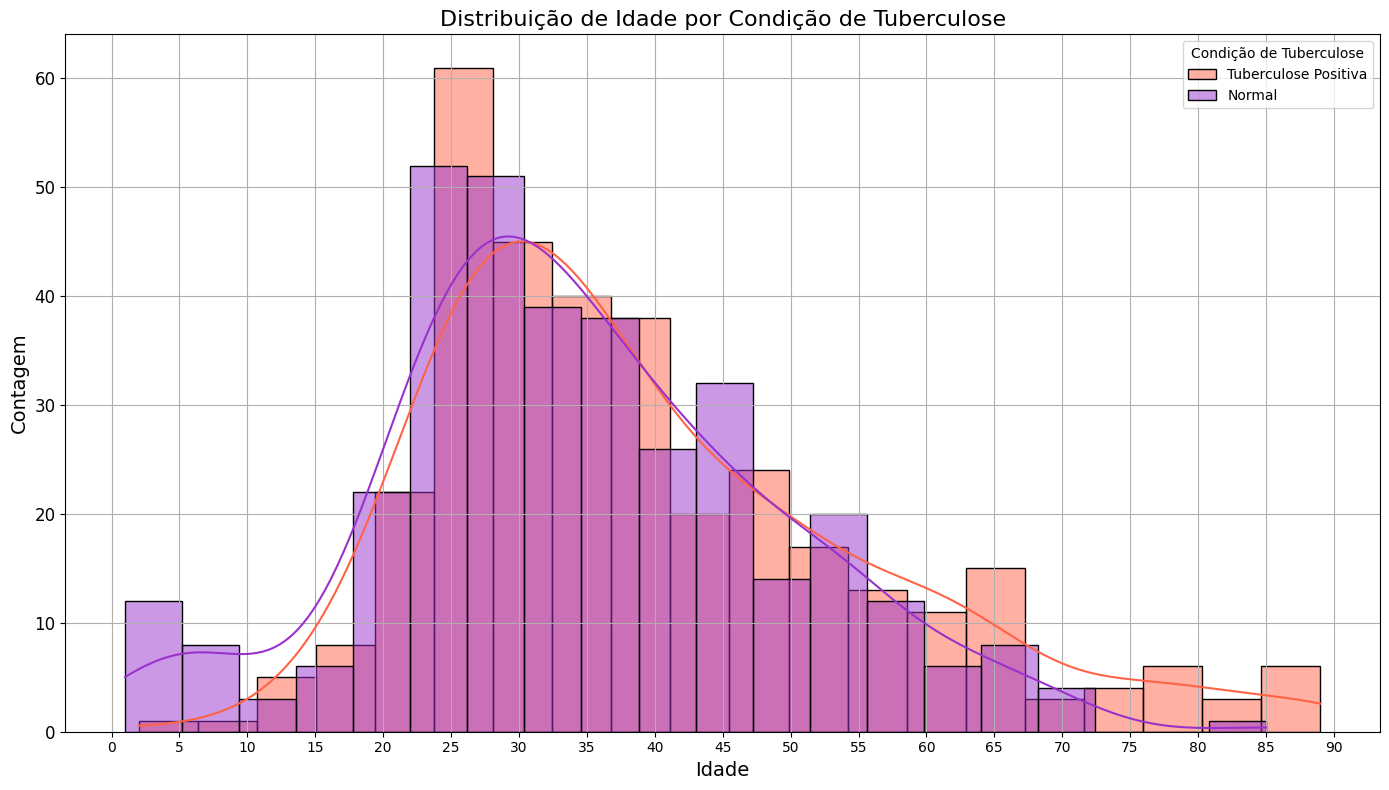

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming metadata DataFrame is loaded

# Convert 'age' column to numeric, handling errors
metadata['age'] = pd.to_numeric(metadata['age'], errors='coerce')

# Drop rows with invalid age values (NaN after conversion)
metadata = metadata.dropna(subset=['age'])

plt.figure(figsize=(14, 8))  # Aumenta o tamanho do gráfico

# Histograma para Tuberculose Positiva
sns.histplot(metadata[metadata['ptb'] == 1]['age'], kde=True, label='Tuberculose Positiva', color='tomato', bins=20)

# Histograma para Normal (sem Tuberculose)
sns.histplot(metadata[metadata['ptb'] == 0]['age'], kde=True, label='Normal', color='darkorchid', bins=20)

# Ajuste das legendas e título
plt.legend(title="Condição de Tuberculose", loc='upper right')
plt.title('Distribuição de Idade por Condição de Tuberculose', fontsize=16)

# Ajuste das idades no eixo X
plt.xlabel('Idade', fontsize=14)
plt.ylabel('Contagem', fontsize=14)

# Melhorando a visualização dos eixos
# Convert age to integers before using in range
plt.xticks(range(0, int(metadata['age'].max()) + 5, 5))  # Ajuste nos ticks de idade (passo de 5 anos)
plt.yticks(fontsize=12)
plt.grid(True)

plt.tight_layout()  # Ajusta automaticamente os elementos do gráfico para caberem melhor
plt.show()

<ipython-input-29-af7a6459bd5c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata['age_group'] = pd.cut(metadata['age'], bins=age_bins, labels=age_labels, right=False)
<ipython-input-29-af7a6459bd5c>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_grouped = metadata[metadata['ptb'] == 1].groupby('age_group').size()


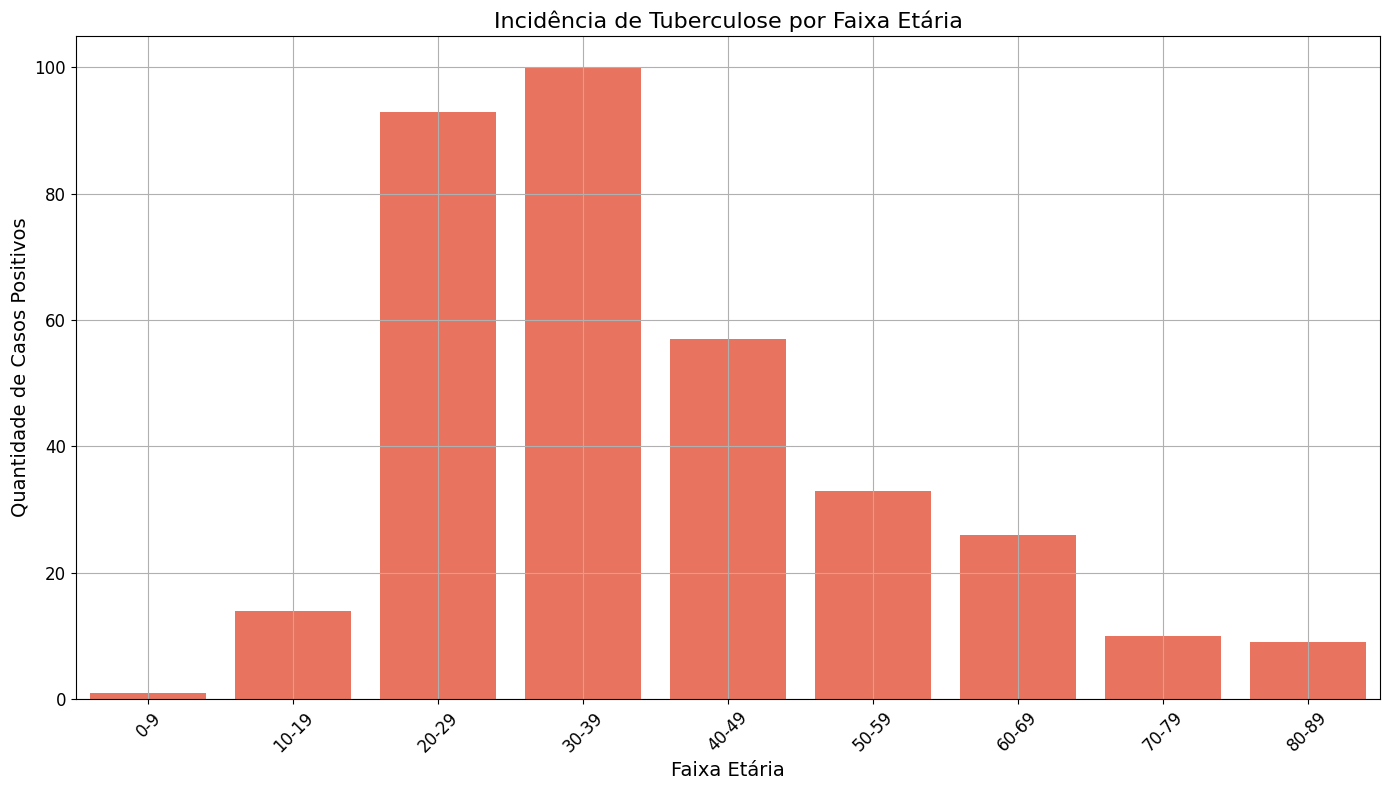

In [ ]:
# Agrupar por faixa etária e contar os casos positivos (PTB=1)
# Criando faixas de idade para análise
age_bins = range(0, int(metadata['age'].max()) + 10, 10)  # Faixas de 10 anos
age_labels = [f'{x}-{x+9}' for x in age_bins[:-1]]  # Etiquetas das faixas

# Criar uma nova coluna de faixa etária
metadata['age_group'] = pd.cut(metadata['age'], bins=age_bins, labels=age_labels, right=False)

# Contagem de casos positivos (PTB=1) por faixa etária
age_grouped = metadata[metadata['ptb'] == 1].groupby('age_group').size()

# Plotando o gráfico de barras
plt.figure(figsize=(14, 8))
sns.barplot(x=age_grouped.index, y=age_grouped.values, color='tomato')

# Ajustando título e rótulos
plt.title('Incidência de Tuberculose por Faixa Etária', fontsize=16)
plt.xlabel('Faixa Etária', fontsize=14)
plt.ylabel('Quantidade de Casos Positivos', fontsize=14)

# Melhorando a visualização
plt.xticks(rotation=45, fontsize=12)  # Rotacionar os rótulos das faixas etárias
plt.yticks(fontsize=12)
plt.grid(True)

# Exibindo o gráfico
plt.tight_layout()
plt.show()


<ipython-input-31-2f16d255f667>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata['age_group'] = pd.cut(metadata['age'], bins=age_bins, labels=age_labels, right=False)
<ipython-input-31-2f16d255f667>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_grouped_positive = metadata[metadata['ptb'] == 1].groupby('age_group').size()


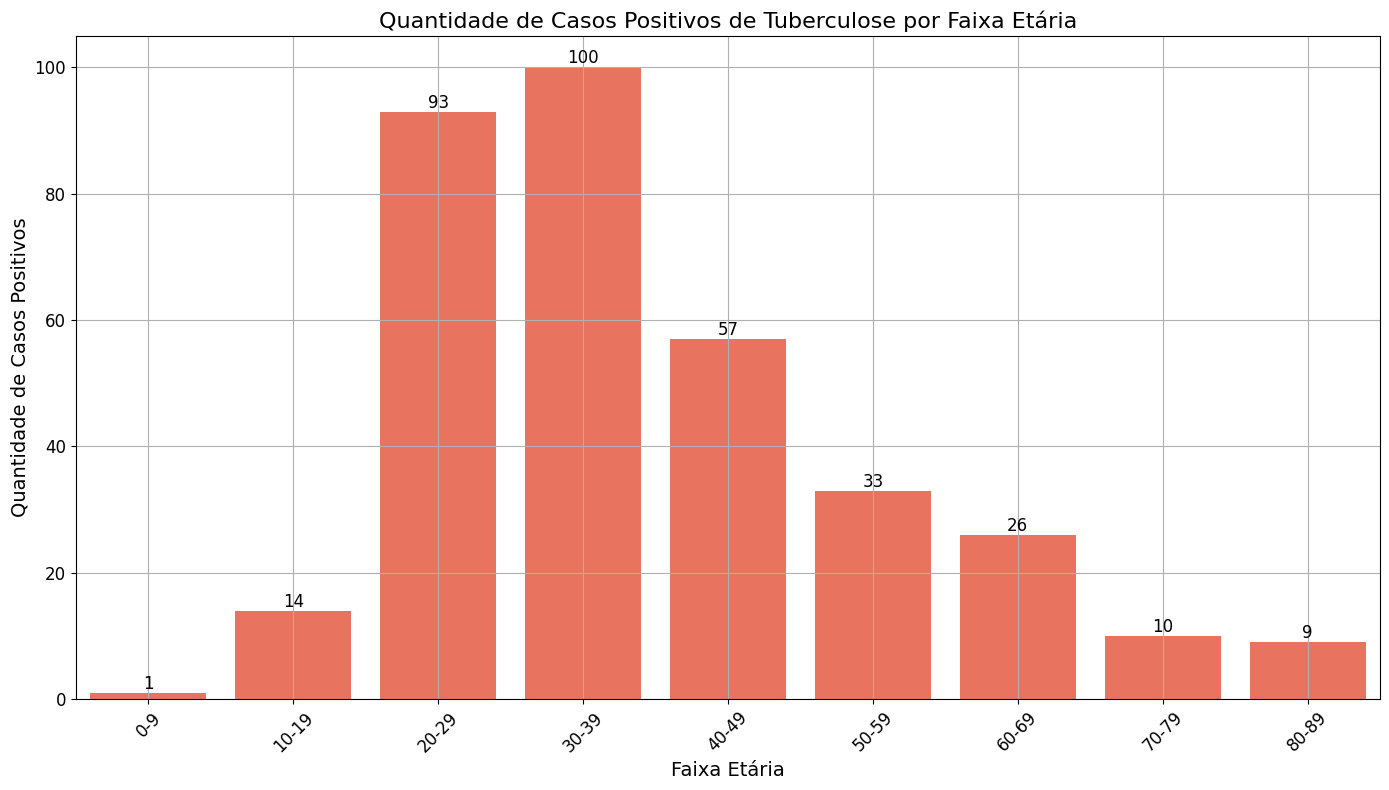

In [ ]:
# Agrupar por faixa etária e contar os casos positivos (PTB=1)
# Criando faixas de idade para análise
age_bins = range(0, int(metadata['age'].max()) + 10, 10)  # Faixas de 10 anos
age_labels = [f'{x}-{x+9}' for x in age_bins[:-1]]  # Etiquetas das faixas

# Criar uma nova coluna de faixa etária
metadata['age_group'] = pd.cut(metadata['age'], bins=age_bins, labels=age_labels, right=False)

# Contagem de casos positivos (PTB=1) por faixa etária
age_grouped_positive = metadata[metadata['ptb'] == 1].groupby('age_group').size()

# Plotando o gráfico de barras
plt.figure(figsize=(14, 8))
bars = sns.barplot(x=age_grouped_positive.index, y=age_grouped_positive.values, color='tomato')

# Adicionando rótulos em cada barra com a quantidade de casos
for bar in bars.patches:
    height = bar.get_height()
    bars.text(
        bar.get_x() + bar.get_width() / 2,  # Posição no eixo X (centro da barra)
        height,  # Posição no eixo Y (altura da barra)
        f'{int(height)}',  # Texto (quantidade de casos)
        ha='center',  # Alinhamento horizontal
        va='bottom',  # Alinhamento vertical
        fontsize=12,  # Tamanho da fonte
        color='black'  # Cor do texto
    )

# Ajustando título e rótulos
plt.title('Quantidade de Casos Positivos de Tuberculose por Faixa Etária', fontsize=16)
plt.xlabel('Faixa Etária', fontsize=14)
plt.ylabel('Quantidade de Casos Positivos', fontsize=14)

# Melhorando a visualização
plt.xticks(rotation=45, fontsize=12)  # Rotacionar os rótulos das faixas etárias
plt.yticks(fontsize=12)
plt.grid(True)

# Exibindo o gráfico
plt.tight_layout()
plt.show()


Pré-processamento:

Converti a variável age para numérica e removi quaisquer valores ausentes.
A coluna gender foi convertida de valores categóricos ("male", "female") para valores binários (0 ou 1), e a coluna county também foi convertida em valores numéricos. Caso prefira um mapeamento mais claro para as regiões, pode-se fazer com valores específicos, como Montgomery = 1, Shenzhen = 0.
Modelo de Regressão Logística:

O modelo foi treinado usando as variáveis age, gender e county para prever a probabilidade de ter tuberculose (variável ptb).
Após o treinamento, o modelo foi testado e geramos a acurácia e o relatório de classificação (precisão, recall, f1-score).
Probabilidades:

Utilizamos predict_proba para calcular as probabilidades de tuberculose positiva para cada paciente no conjunto de teste. O modelo retorna a probabilidade para cada classe (0 e 1), e selecionamos a coluna referente à classe 1 (tuberculose positiva).
O que você vai conseguir com este código:
Acurácia: A porcentagem de previsões corretas no conjunto de dados de teste.
Relatório de Classificação: Medidas como precisão, recall e F1-score para a classe positiva (tuberculose).
Probabilidade de Tuberculose: Para cada paciente no conjunto de teste, o modelo irá fornecer a probabilidade de ele ter tuberculose, o que pode ser útil para decisões clínicas.
O que fazer com os resultados:
Acurácia: Quanto maior a acurácia, melhor o modelo. No entanto, se você tiver um conjunto de dados desbalanceado (muito mais negativos do que positivos), a acurácia pode não ser a melhor métrica. Nesse caso, você pode focar em medidas como precisão e recall.

Probabilidades: Você pode usar as probabilidades para ajustar o ponto de corte (threshold) de quando considerar que um paciente tem tuberculose, dependendo da sensibilidade ou especificidade que deseja alcançar.

In [ ]:
# Importação das bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Supondo que o seu DataFrame metadata já esteja carregado

# 1. Pré-processamento dos dados

# Convertendo a coluna 'age' para numérica (em caso de valores ausentes ou não numéricos)
metadata['age'] = pd.to_numeric(metadata['age'], errors='coerce')

# Removendo linhas com valores nulos em 'age', 'gender' ou 'county'
metadata = metadata.dropna(subset=['age', 'gender', 'county', 'ptb'])

# Convertendo a variável 'gender' para numérico (binário: 1 para masculino, 0 para feminino)
label_encoder_gender = LabelEncoder()
metadata['gender'] = label_encoder_gender.fit_transform(metadata['gender'])

# Convertendo a variável 'county' para numérico (se necessário)
# Exemplo: Montgomery = 1, Shenzhen = 0 (ou usar um LabelEncoder para isso)
label_encoder_county = LabelEncoder()
metadata['county'] = label_encoder_county.fit_transform(metadata['county'])

# 2. Separando as variáveis independentes (X) e dependente (y)
X = metadata[['age', 'gender', 'county']]  # Variáveis explicativas
y = metadata['ptb']  # Variável alvo (Tuberculose)

# 3. Dividindo o conjunto de dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Criando o modelo de Regressão Logística
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)

# 5. Fazendo previsões no conjunto de teste
y_pred = logreg.predict(X_test)

# 6. Avaliando o modelo
print("Acurácia do Modelo: ", accuracy_score(y_test, y_pred))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

# 7. Probabilidade de tuberculose para cada paciente no conjunto de teste
y_prob = logreg.predict_proba(X_test)[:, 1]  # Probabilidade de classe 1 (Tuberculose Positiva)

# Visualizando as primeiras probabilidades
display("\nProbabilidades de Tuberculose Positiva para os primeiros pacientes:")
display(pd.DataFrame({'Idade': X_test['age'], 'Probabilidade de Tuberculose': y_prob}).head())


Acurácia do Modelo:  0.5714285714285714
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.54      0.58      0.56        65
           1       0.61      0.56      0.58        75

    accuracy                           0.57       140
   macro avg       0.57      0.57      0.57       140
weighted avg       0.57      0.57      0.57       140



'\nProbabilidades de Tuberculose Positiva para os primeiros pacientes:'

,Idade,Probabilidade de Tuberculose
158,20.0,0.350031
504,28.0,0.394060
401,25.0,0.466629
155,41.0,0.469099
325,69.0,0.711720


Testando outro modelo

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Definindo o modelo Random Forest
rf_model = RandomForestClassifier()

# Validação cruzada
cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy').mean()


0.5691280566280567

In [ ]:
# Importação das bibliotecas necessárias
from sklearn.metrics import confusion_matrix
import pandas as pd

# 1. Prevendo as probabilidades de tuberculose (classe 1) no conjunto de teste
y_prob = logreg.predict_proba(X_test)[:, 1]  # Probabilidade da classe 1 (Tuberculose Positiva)

# 2. Ajustando o threshold (definindo 0.6 como exemplo)
threshold = 0.6
y_pred_adjusted = (y_prob >= threshold).astype(int)  # Se a probabilidade for maior ou igual a 0.6, considera como 1 (tuberculose positiva)

# 3. Avaliando com a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred_adjusted)

# 4. Exibindo a matriz de confusão
print("Matriz de Confusão:")
print(conf_matrix)

# 5. Relatório de classificação com o novo threshold
from sklearn.metrics import classification_report
print("\nRelatório de Classificação (com threshold ajustado):")
print(classification_report(y_test, y_pred_adjusted))

# 6. Visualizando as probabilidades ajustadas
display("\nProbabilidades de Tuberculose Positiva para os primeiros pacientes ajustadas ao threshold:")
display(pd.DataFrame({'Idade': X_test['age'], 'Probabilidade de Tuberculose': y_prob, 'Previsão Ajustada': y_pred_adjusted}).head())


Matriz de Confusão:
[[57  8]
 [63 12]]

Relatório de Classificação (com threshold ajustado):
              precision    recall  f1-score   support

           0       0.47      0.88      0.62        65
           1       0.60      0.16      0.25        75

    accuracy                           0.49       140
   macro avg       0.54      0.52      0.43       140
weighted avg       0.54      0.49      0.42       140



'\nProbabilidades de Tuberculose Positiva para os primeiros pacientes ajustadas ao threshold:'

,Idade,Probabilidade de Tuberculose,Previsão Ajustada
158,20.0,0.350031,0
504,28.0,0.394060,0
401,25.0,0.466629,0
155,41.0,0.469099,0
325,69.0,0.711720,1


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Criando o modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Avaliando o modelo
y_pred_rf = rf.predict(X_test)
print("Acurácia do Random Forest: ", accuracy_score(y_test, y_pred_rf))
print("Relatório de Classificação do Random Forest:\n", classification_report(y_test, y_pred_rf))


Acurácia do Random Forest:  0.5357142857142857
Relatório de Classificação do Random Forest:
               precision    recall  f1-score   support

           0       0.50      0.63      0.56        65
           1       0.59      0.45      0.51        75

    accuracy                           0.54       140
   macro avg       0.54      0.54      0.53       140
weighted avg       0.55      0.54      0.53       140

